## Import libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
## NLP libraries to clean the text data
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
## vectorization technique TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer 
## For Splitting the dataset
from sklearn.model_selection import train_test_split
## model libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#Accuracy measuring library
from sklearn.metrics import accuracy_score


## Loading the data 

In [2]:
df = pd.read_csv("data.csv")


In [3]:
type(df)

pandas.core.frame.DataFrame

In [3]:
df.shape

(4009, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [5]:
df.describe()

,Label
count,4009.000000
mean,0.466949
std,0.498969
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
df.head(10)

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0
6,https://www.nytimes.com/2017/10/10/us/politics...,Kansas Tried a Tax Plan Similar to Trump’s. It...,"In 2012, Kansas lawmakers, led by Gov. Sam Bro...",1
7,https://www.reuters.com/article/us-india-cenba...,"India RBI chief: growth important, but not at ...",The Reserve Bank of India (RBI) Governor Urjit...,1
8,https://www.reuters.com/article/us-climatechan...,EPA chief to sign rule on Clean Power Plan exi...,"Scott Pruitt, Administrator of the U.S. Enviro...",1
9,https://www.reuters.com/article/us-air-berlin-...,Talks on sale of Air Berlin planes to easyJet ...,FILE PHOTO - An Air Berlin sign is seen at an ...,1


In [7]:
df.tail(10)

,URLs,Headline,Body,Label
3999,https://www.reuters.com/article/us-baseball-ml...,Red Sox fire manager Farrell after five seasons,"FILE PHOTO: Oct 25, 2013; St. Louis, MO, USA; ...",1
4000,https://www.activistpost.com/2017/09/false-arr...,35 False Matches and 1 Erroneous Arrest As Pol...,By Nicholas West\nAll things biometric are swe...,0
4001,https://www.nytimes.com/2017/10/09/obituaries/...,"Hervé Leroux, Creator of the Hervé Léger Banda...","Mr. Leroux was born Hervé Peugnet on May 30, 1...",1
4002,http://www.cnn.com/videos/politics/2017/10/09/...,The price tag for Pence's trip to Indianapolis,Ethical questions loom after Vice President Mi...,1
4003,http://beforeitsnews.com/u-s-politics/2017/10/...,CNN and Globalist Exposed - Steve Quayle and A...,"Vietnam Is in Great Danger, You Must Publish a...",0
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1
4008,http://beforeitsnews.com/u-s-politics/2017/10/...,Vice President Mike Pence Leaves NFL Game Beca...,Vice President Mike Pence Leaves NFL Game Beca...,0


In [8]:
df.columns

Index(['URLs', 'Headline', 'Body', 'Label'], dtype='object')

In [9]:
df.isnull().sum()

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

In [10]:
df.Body.isnull().sum()

21

In [11]:
float(100*0.21/4009)

0.005238214018458469

In [12]:
Body_mode = df.Body.mode()[0]
Body_mode

'A Potato Battery Can Light up a Room for Over a Month DIY (System That Can Be Used to Provide Rooms With LED-Powered Lighting for as Long as 40 days) +Video'

In [13]:
df.Body.fillna(Body_mode,inplace=True)
df.Body.value_counts(normalize=True)

A Potato Battery Can Light up a Room for Over a Month DIY (System That Can Be Used to Provide Rooms With LED-Powered Lighting for as Long as 40 days) +Video                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### Exploratory Data Analysis 

<AxesSubplot:>

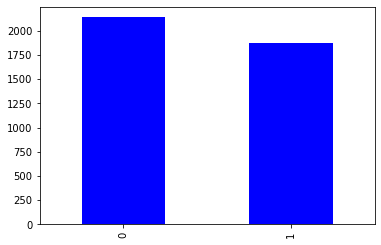

In [14]:
df['Label'].value_counts().plot.bar(color = 'blue',figsize = (6,4))

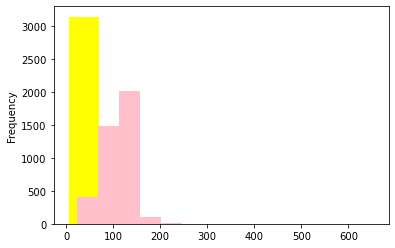

In [15]:
length_df = df['Headline'].str.len().plot.hist(color = 'yellow',figsize=(6,4))
length_df = df['URLs'].str.len().plot.hist(color = 'pink',figsize=(6,4))

Text(0.5, 1.0, 'Most Frequently Occuring Words\xa0-\xa0Top\xa030')

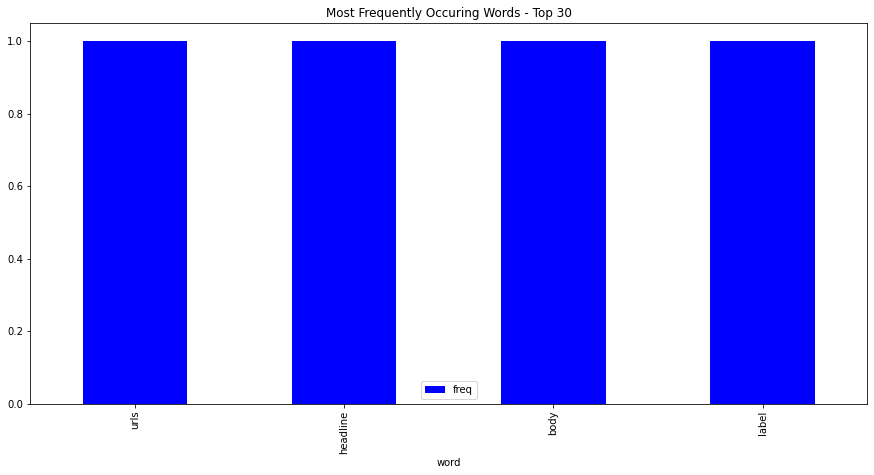

In [16]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

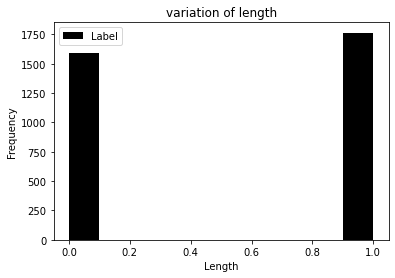

In [17]:
df.groupby('URLs').mean().plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

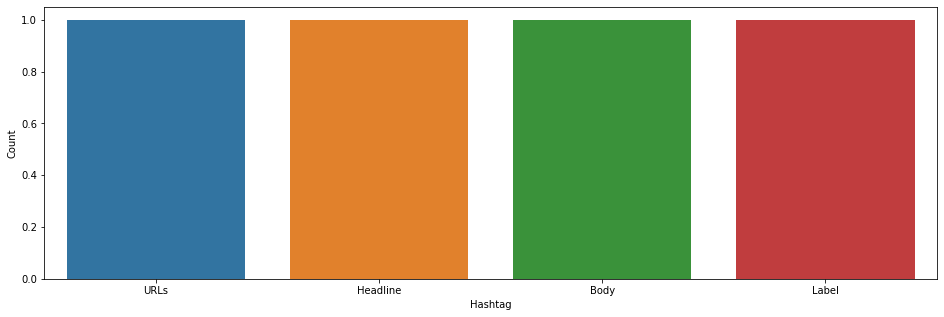

In [18]:
import nltk
a = nltk.FreqDist(df)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Data-PreProcessing 

#### 1.Removing the Null Values 
#### 2.Adding a new field 
#### 3.Drop features that are not needed 
#### 4.Text processing


In [19]:
df = df.copy()

### Removing the Null Values

#### As Body field has some empty fields, it can be handled in two ways:

    #### 1)Drop the 21 rows
    #### 2)Replace the null value with a dummy string

#### Here, I will be going with the 2nd option, because although dropping 21 rows would not affect the accuracy, as it is just a minute portion of our large dataset, it is never recommended.

#### I will be replacing the Null(Nan) values in 'Body' field with an empty string ('')

In [20]:
df['Body'] = df['Body'].fillna('')

In [21]:
df.isnull().sum()

URLs        0
Headline    0
Body        0
Label       0
dtype: int64

#### Adding a new column 

In [22]:
df['News'] = df['Headline']+df['Body']

In [23]:
df.head()

,URLs,Headline,Body,Label,News
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,Four ways Bob Corker skewered Donald TrumpImag...
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,Linklater's war veteran comedy speaks to moder...
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,Trump’s Fight With Corker Jeopardizes His Legi...
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,Egypt's Cheiron wins tie-up with Pemex for Mex...
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,Jason Aldean opens 'SNL' with Vegas tributeCou...


In [24]:
df.columns

Index(['URLs', 'Headline', 'Body', 'Label', 'News'], dtype='object')

### Drop features that are not needed 

In [25]:
features_drop = ['URLs','Headline','Body']
df = df.drop(features_drop,axis=1)

In [26]:
df.columns

Index(['Label', 'News'], dtype='object')

### Text Processing 

#### 1)Remove symbols
#### 2)Remove stopwords
#### 3)Stemming

In [27]:
ps = PorterStemmer() 
def wordopt(text):
    text = re.sub('[^a-zA-Z]',' ',text)
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    return text 

In [28]:
df['News'] = df['News'].apply(wordopt)

In [29]:
df.head()

,Label,News
0,1,four way bob corker skewer donald trumpimag co...
1,1,linklat war veteran comedi speak modern americ...
2,1,trump fight corker jeopard legisl agendath feu...
3,1,egypt cheiron win tie pemex mexican onshor oil...
4,1,jason aldean open snl vega tributecountri sing...


### Splitting DataSet 

In [30]:
x = df['News']
y = df['Label']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

### 5 . Vectorization

##### This is used to handle our text data, by converting it into vectors

In [31]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### 6.Model Fitting 
#### I will be fitting my data onto 3 classifications models 
#### 1.Logistic Regression 
#### 2.SVM
#### 3.RandomForestClassifier

#### The best one amongst the 3 will be further 

In [32]:
#1. Logistic Regression - used because this model is best suited for binary classification
LR_model = LogisticRegression()

#Fitting training set to the model
LR_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
lr_y_pred = LR_model.predict(xv_test)

#Calculate the accurracy of this model
score = accuracy_score(y_test,lr_y_pred)
print('Accuracy of LR model is',score)

Accuracy of LR model is 0.9690927218344965


In [33]:
#2. Support Vector Machine(SVM) - SVM works relatively well when there is a clear margin of separation between classes.
svm_model = SVC(kernel='linear')

#Fitting training set to the model
svm_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
svm_y_pred = svm_model.predict(xv_test)

#Calculate the accuracy score of this model
score = accuracy_score(y_test,svm_y_pred)

+++++++++++++++++++++

print('Accuracy of svm model is',score)

Accuracy of svm model is 0.9820538384845464


In [34]:
#3. Random Forest Classifier 
RFC_model = RandomForestClassifier(random_state=0)

#Fitting training set to the model
RFC_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
rfc_y_pred = RFC_model.predict(xv_test)

#Calculate the accuracy score of this model
score = accuracy_score(y_test,rfc_y_pred)
print('Accuracy of RFC model is',score)

Accuracy of RFC model is 0.9710867397806581


### 7.Manual Model Testing

In [35]:
# As SVM is able to provide best results - SVM will be used to check the news liability
def fake_news_det(news):
    input_data = {"text":[news]}
    new_def_test = pd.DataFrame(input_data)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    #print(new_x_test)
    vectorized_input_data = vectorization.transform(new_x_test)
    prediction = svm_model.predict(vectorized_input_data)
    
    if prediction == 1:
        print("Not a Fake News")
    else:
        print("Fake News")

In [36]:
fake_news_det('U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.')

Not a Fake News


In [37]:
fake_news_det('Many other aspects of global climate are changing as well. High temperature extremes and heavy precipitation events are increasing, glaciers and snow cover are shrinking, and sea ice is retreating. Seas are warming, rising, and becoming more acidic, and flooding is become more frequent along the U.S. coastline.')

Not a Fake News


In [38]:
fake_news_det('JetNation FanDuel League; Week 4 of readers think this story is Fact. Add your two cents.(Before Its News)Our FanDuel league is back again this week. Here are the details:$900 in total prize money. $250 to the winner. $10 to enter.Remember this is a one week league, pick your lineup against the salary cap and next week if you want to play again you can pick a completely different lineup if you want.Click this link to enter — http://fanduel.com/JetNation You can discuss this with other NY Jets fans on the Jet Nation message board. Or visit of on Facebook.Source: http://www.jetnation.com/2017/09/27/jetnation-fanduel-league-week-4')

Fake News
